In [1]:
pip install pyaudio


Note: you may need to restart the kernel to use updated packages.


In [2]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

#DataFlair - Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
            result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            #pitches = np.mean(librosa.piptrack(y=X, sr=sample_rate), axis=0)
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result


#DataFlair - Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
#DataFlair - Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

#DataFlair - Load the data and extract features for each sound file
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob("D:\\EPITA\\Curriculum\\Optimization\\ravdess-emotional-speech-audio\\Actor_*\\*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=9)

#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=load_data(test_size=0.3)

#DataFlair - Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

#DataFlair - Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=1500)

#DataFlair - Train the model
model.fit(x_train,y_train)

#DataFlair - Predict for the test set
y_pred=model.predict(x_test)

#DataFlair - Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#DataFlair - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Features extracted: 180
Accuracy: 74.26%


In [3]:
for i in range(len(x_test)):
    print(len(x_test[i]))

180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180


In [4]:
print(x_train, y_train)
print(len(x_test))

[[-6.98910828e+02  6.72396469e+01  6.17663145e+00 ...  7.71708741e-08
   1.28724302e-08  7.11364478e-09]
 [-6.19317871e+02  7.58024979e+01 -1.19600601e+01 ...  6.41060012e-07
   6.25748768e-08  7.33082395e-09]
 [-4.85298309e+02  7.49215622e+01 -1.19717941e+01 ...  4.06490835e-06
   3.61294155e-07  1.45132075e-08]
 ...
 [-5.98688110e+02  5.80942459e+01 -7.90877283e-01 ...  1.83178611e-06
   1.84982994e-07  7.96273536e-09]
 [-6.67639465e+02  6.86084976e+01  5.38877678e+00 ...  1.23163659e-07
   1.47386148e-08  7.43224149e-09]
 [-6.13189148e+02  4.63625526e+01 -2.80027676e+00 ...  1.59534557e-06
   1.13446816e-07  1.10568239e-08]] ['disgust', 'happy', 'disgust', 'calm', 'disgust', 'happy', 'disgust', 'disgust', 'calm', 'disgust', 'fearful', 'fearful', 'calm', 'fearful', 'disgust', 'fearful', 'fearful', 'calm', 'fearful', 'disgust', 'calm', 'happy', 'calm', 'calm', 'fearful', 'fearful', 'happy', 'happy', 'calm', 'disgust', 'disgust', 'happy', 'fearful', 'happy', 'disgust', 'disgust', 'fear

In [5]:
print(x_test, y_test)

[[-4.69359497e+02  7.23961868e+01 -1.47085667e+01 ...  2.22055201e-06
   2.07237392e-07  1.21822712e-08]
 [-6.08390015e+02  7.58604202e+01 -7.15431976e+00 ...  9.89099362e-07
   9.58929718e-08  9.69895098e-09]
 [-5.69346558e+02  5.87526665e+01 -1.13478670e+01 ...  7.11634584e-07
   6.14814866e-08  6.11492723e-09]
 ...
 [-7.47700439e+02  7.80554810e+01  1.11761608e+01 ...  6.80388084e-08
   1.02505373e-08  6.75965328e-09]
 [-5.68636047e+02  7.14218979e+01 -4.45530128e+00 ...  3.84268077e-07
   3.38872468e-08  8.88563267e-09]
 [-6.60817017e+02  8.33865356e+01  1.29060736e+01 ...  2.30356250e-08
   8.39595238e-09  8.13792500e-09]] ['happy', 'disgust', 'disgust', 'calm', 'fearful', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'happy', 'fearful', 'disgust', 'fearful', 'disgust', 'calm', 'happy', 'disgust', 'calm', 'calm', 'fearful', 'happy', 'happy', 'happy', 'calm', 'calm', 'disgust', 'calm', 'disgust', 'happy', 'disgust', 'disgust', 'disgust', 'disgust', 'fearful', 'happy', 'fea

In [26]:
#print(x_test[0]+x_test[1])

combine = list(zip(y_test, x_test))

dict1 = {'happy': [], 'disgust': [], 'fearful': [], 'calm': [] }

for i in range(len(combine)):
    if combine[i][0] == 'happy':
        dict1['happy'] = combine[i][1]
    elif combine[i][0] == 'disgust':
        dict1['disgust'] = combine[i][1]
    elif combine[i][0] == 'fearful':
        dict1['fearful'] = combine[i][1]
    elif combine[i][0] == 'calm':
        dict1['calm'] = combine[i][1]
        
        
#print(dict1)


for i in dict1.keys():
    #print(i)
    for j in range(len(combine)):
        if i==combine[j][0]:
            dict1[i] +=combine[j][1]
print(dict1)
for _,v in dict1.items():
    print(len(v))

{'happy': array([-1.80497960e+06,  2.04447964e+05, -2.93468567e+04,  1.90562569e+04,
        7.84123715e+02,  2.36780208e+04, -2.75596678e+04, -3.07433451e+03,
       -2.17231638e+04, -2.00005190e+04, -1.31272749e+04, -6.40303568e+03,
       -8.42027344e+03, -1.05434631e+04, -9.86716212e+03, -5.80969761e+02,
       -8.45153989e+03, -2.00935063e+03, -5.59946116e+03, -7.99584033e+03,
       -5.64807201e+03, -4.46174788e+03, -4.22886916e+03, -4.23232720e+03,
       -6.80625108e+03, -2.13887264e+03, -5.65297962e+03, -4.03795764e+02,
       -1.04749021e+03,  1.17720587e+03,  4.55738300e+02,  2.59850775e+03,
        3.13924798e+02,  2.61209385e+03,  1.57122794e+03,  1.21272865e+03,
        1.38493917e+03,  1.71041080e+03,  1.86578632e+03,  3.58740801e+03,
        2.00734062e+03,  1.99200756e+03,  1.97965382e+03,  1.99063191e+03,
        2.04116383e+03,  2.06507248e+03,  2.04823001e+03,  2.03159683e+03,
        2.06648394e+03,  2.05065546e+03,  2.03439419e+03,  2.01862537e+03,
        2.06664

In [27]:
import pandas as pd

df = pd.DataFrame(dict1, columns=['happy','disgust','fearful', 'calm'])
print(df)

            happy       disgust       fearful          calm
0   -1.804980e+06 -2.179891e+06 -1.361573e+06 -2.367847e+06
1    2.044480e+05  2.426374e+05  1.445787e+05  2.611751e+05
2   -2.934686e+04 -1.083572e+04 -2.532394e+04  1.085051e+04
3    1.905626e+04  3.619185e+04  1.900233e+04  5.866516e+04
4    7.841237e+02 -3.451714e+03 -7.232906e+03  8.117359e+03
..            ...           ...           ...           ...
175  1.997519e-02  1.637083e-02  3.756419e-02  1.193423e-03
176  1.391359e-02  1.086331e-02  2.891058e-02  7.627201e-04
177  6.655227e-03  4.988055e-03  1.319364e-02  3.313579e-04
178  6.826080e-04  5.050945e-04  1.219366e-03  4.907746e-05
179  2.532206e-05  3.065678e-05  2.216497e-05  2.539375e-05

[180 rows x 4 columns]


            happy   disgust   fearful      calm
happy    1.000000  0.999887  0.999903  0.999538
disgust  0.999887  1.000000  0.999791  0.999811
fearful  0.999903  0.999791  1.000000  0.999408
calm     0.999538  0.999811  0.999408  1.000000


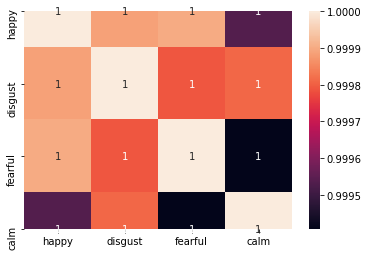

In [32]:
import matplotlib.pyplot as plt
import seaborn as sn

print(df.corr())



corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)

-------------------------------------------------------------------------------------------------------------------

In [6]:
print(x_test.shape)
print(len(y_test))

(202, 180)
202


In [279]:
print(len(x_test[0]))

180


In [272]:
for i in range(len(x_test)):
    print(len(x_test[i]))

180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180
180


In [1]:
#np addition

net = list(zip(x_test, y_test))
print(net)



for j in range(len(combine)):
    if i==combine[j][0]:
        dict1[i].append(j)
#print(dict1)


NameError: name 'x_test' is not defined

In [249]:
average_array = [] 
for i in range(len(x_test)):
    k=0
    for j in range(len(x_test[i])):
        k += (x_test[i][j]/len(x_test))
    average_array.append(k)
print(average_array)

[-1.862973182764998, -2.609465925737671, -3.1583396001307293, -2.962223501143355, -1.2775152434787174, -2.2694523962731723, -2.614569830756311, -2.413374811424124, -2.8065126927676434, -2.694377321726019, -2.0991572973801738, -1.377309532289233, -2.9950409676354446, -3.293298629973207, -2.7025926434496115, -2.472086473971673, -2.214863541641843, -2.217396197664846, -3.13538985089384, -3.59511242254777, -2.4815605675724077, -2.893523968552401, -2.483978279550073, -3.510058026684528, -2.5008254578130447, -2.8731716907890723, -2.917319629345659, -3.547756918826197, -3.06951337928064, -3.029694232706449, -2.7199690817758597, -3.0592316154875396, -3.0523646526070363, -3.2743603733328173, -2.0673128763275908, -3.4619785184128005, -1.2288707241961583, -3.2535678873852154, -2.8032742966046182, -2.8441938186943565, -3.0544131711338927, -2.795789423590041, -3.1827857166211655, -3.356525783113356, -2.2300406510163464, -2.8924425992747977, -3.428468591307627, -2.168166715636525, -2.755543047276763

In [280]:
for keys, values in emotions.items():
    print(keys,values)

01 neutral
02 calm
03 happy
04 sad
05 angry
06 fearful
07 disgust
08 surprised


In [281]:
for i in observed_emotions:
    for key, values in emotions.items():
        if i == values:
            print(key)

02
03
06
07


In [282]:
#print(list(zip(x_test,y_test)))
print(y_test)
print(set(y_test))

['happy', 'disgust', 'disgust', 'calm', 'fearful', 'disgust', 'disgust', 'disgust', 'disgust', 'disgust', 'happy', 'fearful', 'disgust', 'fearful', 'disgust', 'calm', 'happy', 'disgust', 'calm', 'calm', 'fearful', 'happy', 'happy', 'happy', 'calm', 'calm', 'disgust', 'calm', 'disgust', 'happy', 'disgust', 'disgust', 'disgust', 'disgust', 'fearful', 'happy', 'fearful', 'disgust', 'disgust', 'happy', 'disgust', 'disgust', 'calm', 'disgust', 'fearful', 'calm', 'calm', 'happy', 'happy', 'calm', 'disgust', 'calm', 'disgust', 'fearful', 'happy', 'calm', 'calm', 'disgust', 'happy', 'happy', 'calm', 'calm', 'happy', 'calm', 'fearful', 'calm', 'happy', 'calm', 'calm', 'fearful', 'happy', 'fearful', 'happy', 'fearful', 'calm', 'calm', 'calm', 'happy', 'calm', 'happy', 'happy', 'calm', 'happy', 'calm', 'calm', 'fearful', 'disgust', 'calm', 'fearful', 'fearful', 'disgust', 'disgust', 'disgust', 'happy', 'calm', 'disgust', 'disgust', 'disgust', 'fearful', 'disgust', 'disgust', 'disgust', 'disgust',

In [284]:
test_emotion_keys = []
for i in y_test:
    for key, value in emotions.items():
        if i == value:
            test_emotion_keys.append(key)
print(test_emotion_keys)
print(len(x_test))
print(len(average_array))
print(len(test_emotion_keys))

'''combine = list(zip(y_test, average_array))

#print(combine)
dict1 = {'happy': [], 'disgust': [], 'fearful': [], 'calm': [] }

for i in dict1.keys():
    #print(i)
    for j in range(len(combine)):
        if i==combine[j][0]:
            dict1[i].append(j)
#print(dict1)
for _,v in dict1.items():
    print(len(v))
'''


['03', '07', '07', '02', '06', '07', '07', '07', '07', '07', '03', '06', '07', '06', '07', '02', '03', '07', '02', '02', '06', '03', '03', '03', '02', '02', '07', '02', '07', '03', '07', '07', '07', '07', '06', '03', '06', '07', '07', '03', '07', '07', '02', '07', '06', '02', '02', '03', '03', '02', '07', '02', '07', '06', '03', '02', '02', '07', '03', '03', '02', '02', '03', '02', '06', '02', '03', '02', '02', '06', '03', '06', '03', '06', '02', '02', '02', '03', '02', '03', '03', '02', '03', '02', '02', '06', '07', '02', '06', '06', '07', '07', '07', '03', '02', '07', '07', '07', '06', '07', '07', '07', '07', '07', '02', '02', '07', '07', '02', '07', '02', '03', '02', '03', '07', '06', '02', '02', '02', '02', '07', '07', '06', '03', '07', '06', '03', '06', '02', '03', '02', '06', '07', '02', '03', '06', '03', '07', '06', '06', '06', '02', '03', '03', '02', '07', '02', '07', '06', '02', '07', '06', '02', '07', '03', '07', '07', '06', '07', '06', '02', '03', '06', '06', '06', '06', '02

"combine = list(zip(y_test, average_array))\n\n#print(combine)\ndict1 = {'happy': [], 'disgust': [], 'fearful': [], 'calm': [] }\n\nfor i in dict1.keys():\n    #print(i)\n    for j in range(len(combine)):\n        if i==combine[j][0]:\n            dict1[i].append(j)\n#print(dict1)\nfor _,v in dict1.items():\n    print(len(v))\n"

In [285]:
#print(average_array, test_emotion_keys)

import pandas as pd

df = pd.DataFrame(dict1, columns=['happy','disgust','fearful', 'calm'])
print(df)



ValueError: arrays must all be same length

In [286]:
print(len(average_array),len(test_emotion_keys))

202 202


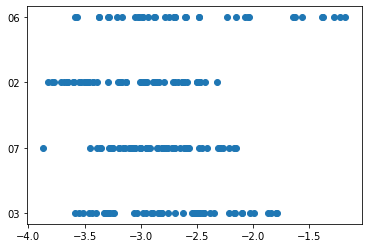

In [287]:
import matplotlib.pyplot as plt

plt.scatter(average_array, test_emotion_keys)
plt.show()

{'A': [-1.862973182764998, -2.609465925737671, -3.1583396001307293, -2.962223501143355, -1.2775152434787174, -2.2694523962731723, -2.614569830756311, -2.413374811424124, -2.8065126927676434, -2.694377321726019, -2.0991572973801738, -1.377309532289233, -2.9950409676354446, -3.293298629973207, -2.7025926434496115, -2.472086473971673, -2.214863541641843, -2.217396197664846, -3.13538985089384, -3.59511242254777, -2.4815605675724077, -2.893523968552401, -2.483978279550073, -3.510058026684528, -2.5008254578130447, -2.8731716907890723, -2.917319629345659, -3.547756918826197, -3.06951337928064, -3.029694232706449, -2.7199690817758597, -3.0592316154875396, -3.0523646526070363, -3.2743603733328173, -2.0673128763275908, -3.4619785184128005, -1.2288707241961583, -3.2535678873852154, -2.8032742966046182, -2.8441938186943565, -3.0544131711338927, -2.795789423590041, -3.1827857166211655, -3.356525783113356, -2.2300406510163464, -2.8924425992747977, -3.428468591307627, -2.168166715636525, -2.755543047

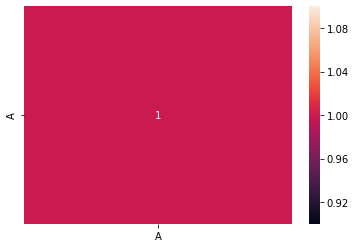

In [288]:
import pandas as pd

Data={'A': average_array, 'B':test_emotion_keys}

print(Data)
df = pd.DataFrame(Data, columns=['A','B'])
print(df)

df.corr()

import seaborn as sn
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)

In [191]:
d.corr()


,A
A,1.0


In [200]:
from pandas import DataFrame

Data = {'A': [45,37,42,35,39],
        'B': [38,31,26,28,33],
        'C': [10,15,17,21,12]
        }

d = DataFrame(Data,columns=['A','B','C'])
print (d)

    A   B   C
0  45  38  10
1  37  31  15
2  42  26  17
3  35  28  21
4  39  33  12


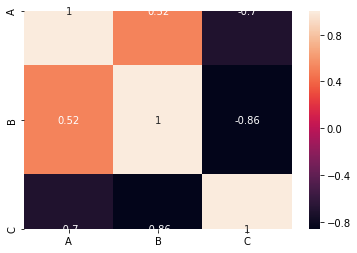

In [242]:
d.corr()
import seaborn as sn
corrMatrix = d.corr()
sn.heatmap(corrMatrix, annot=True)